## **Corner Detection**
1. Harris Corner Detection
2. Shi-Tomasi Detection

## **Harris Corner**

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
flat_chess=cv2.imread("../DATA/flat_chessboard.png")
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

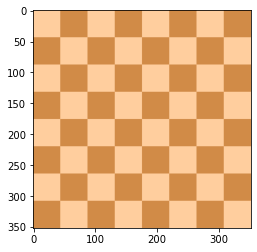

In [3]:
plt.imshow(flat_chess)

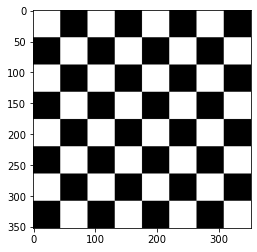

In [4]:
gray_flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_flat_chess, cmap="gray")

In [5]:
real_chess=cv2.imread("../DATA/real_chessboard.jpg")
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

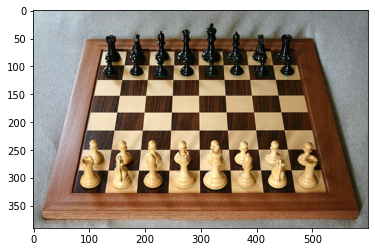

In [6]:
plt.imshow(real_chess)

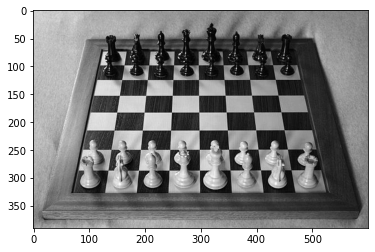

In [7]:
gray_real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_real_chess, cmap="gray")

In [8]:
gray=np.float32(gray_flat_chess)

In [9]:
gray

array([[197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       [197., 197., 197., ..., 127., 127., 127.],
       ...,
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.],
       [127., 127., 127., ..., 197., 197., 197.]], dtype=float32)

In [10]:
dst=cv2.cornerHarris(src=gray, blockSize=2, ksize=3, k=0.04)

In [11]:
dst=cv2.dilate(dst, None)

In [12]:
flat_chess[dst>0.01*dst.max()]=[255,0,0]

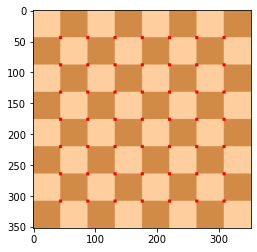

In [13]:
plt.imshow(flat_chess)

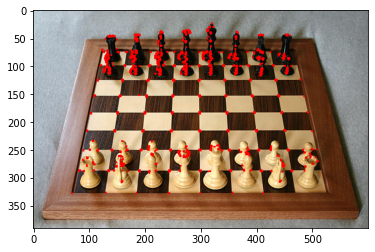

In [15]:
gray=np.float32(gray_real_chess)
dst=cv2.cornerHarris(src=gray, k=0.04, blockSize=2, ksize=3)

dst=cv2.dilate(dst, None)
real_chess[dst>0.01*dst.max()]=[255,0,0]
plt.imshow(real_chess)

## **Shi Tomasi Corner**

In [17]:
real_chess=cv2.imread("../DATA/real_chessboard.jpg")
real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2RGB)

flat_chess=cv2.imread("../DATA/flat_chessboard.png")
flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2RGB)

gray_flat_chess=cv2.cvtColor(flat_chess, cv2.COLOR_BGR2GRAY)
gray_real_chess=cv2.cvtColor(real_chess, cv2.COLOR_BGR2GRAY)

In [19]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess, 5, 0.01, 10)
#5=max corners if you dont want to limit the number of corners, 
#use a negative number (all corners it has detected on its own).
#0.01=quality level parameter
#10=minimum distance 

In [20]:
corners=np.int0(corners)

In [21]:
corners

array([[[308, 308]],

       [[264, 308]],

       [[220, 308]],

       [[176, 308]],

       [[132, 308]]], dtype=int64)

In [22]:
for i in corners:
    x, y=i.ravel()
    cv2.circle(flat_chess, (x, y), 3, [255,0,0], -1)

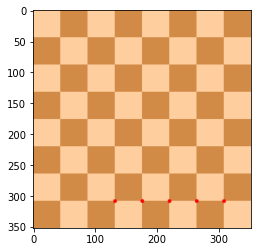

In [23]:
plt.imshow(flat_chess)

In [28]:
corners=cv2.goodFeaturesToTrack(gray_flat_chess, 64, 0.01, 10)
corners=np.int0(corners)
for i in corners:
    x, y=i.ravel()
    cv2.circle(flat_chess, (x, y), 3, [255,0,0], -1)

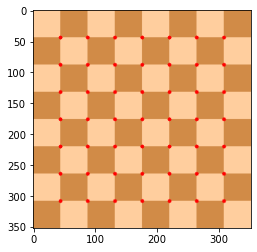

In [29]:
plt.imshow(flat_chess)

In [38]:
corners=cv2.goodFeaturesToTrack(gray_real_chess, 200, 0.01, 10)
corners=np.int0(corners)
for i in corners:
    x, y=i.ravel()
    cv2.circle(real_chess, (x, y), 3, [255,0,0], -1)

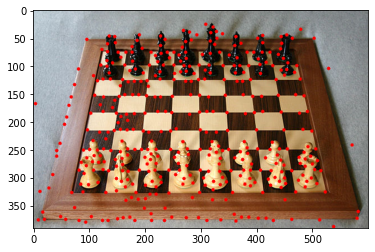

In [39]:
plt.imshow(real_chess)